# Housing Analysis Project
* Student name: Bella Scribner
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# The Business + Project 

- A non-for-profit addiction treatment center is looking to expand their services to offer half-way houses or sober living homes to those who complete the rehabilitation in-patient treatment. 
- maybe look up some short paraphrased argumentation on the importance of halfway houses/sober living homes before returning to full independence is so important to those dealing with addiction and in recovery. 

- The center is inquiring about predictions on how expensive aquiring these houses would be in order to set fundraising and budgeting goals for the new year. Specificially they are interested in homes with certain criteria based on government requirements for halfway houses, as well as how much more or less expensive homes in calmer enviroments would be.  A calm enviroment is ideal for people in recovery.  Furthermore, residential communities tend to push back on sober living homes opening in their communities, thus the center is interested on some data concerning the price of homes in different types of zones, including residential. 

# Data Understanding

In [1]:
import pandas as pd
df = pd.read_csv('data/kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

| Column | Description |
| --- | --- |
| `price`| Sale price of the home (prediction target) |
| `bedrooms` | 
| `bathrooms`|
| `wat

# come back to this when decide exactly what factors to include/not include

In [5]:
df.corr()['price']

id              -0.034096
price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
Name: price, dtype: float64

In [43]:
features_target = ['price', 'sqft_living', 'bathrooms', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']

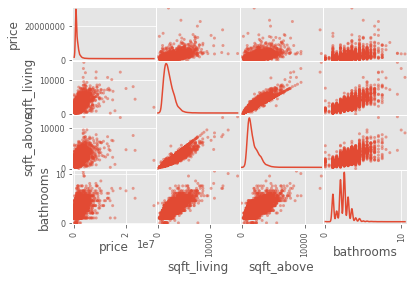

In [56]:
#fig, ax = plt.subplots(figsize=(15,10))
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'sqft_above', 'bathrooms']], diagonal='kde');

`sqft_living`, `bathrooms`, `sqft_above`, all seem promising.  Need to inquire about `waterfront`, `greenbelt`, and `nuisance` in terms of might be good indicators (and what the addiction treatment center might be interested in) as well as `heat_source`, and `sewer_system` for compliance reasons for sober homes.  Lastly, need to look further into either `adddress` or `lat`+`long` to see if can determine zones (homes in dense residential areas tend to have push back from the community if a company tires to install halfway home or sober living home in their neighborhoods). 

In [7]:
df['waterfront'].value_counts()

NO     29600
YES      511
Name: waterfront, dtype: int64

In [8]:
df['greenbelt'].value_counts()

NO     29339
YES      772
Name: greenbelt, dtype: int64

In [9]:
df['nuisance'].value_counts()

NO     24862
YES     5249
Name: nuisance, dtype: int64

In [10]:
df['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [12]:
df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [13]:
df['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [14]:
df['sewer_system'].value_counts()

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [15]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [16]:
df[['lat', 'long']]

,lat,long
0,47.461975,-122.19052
1,47.711525,-122.35591
2,47.502045,-122.22520
3,47.566110,-122.29020
4,47.532470,-122.07188
...,...,...
30150,47.664740,-122.32940
30151,47.565610,-122.38851
30152,47.610395,-122.29585
30153,47.449490,-122.18908


### Notes
Based on this very basic exploration of the data, the first stab at a complex linear regression might include `sqft_living`, `bathrooms`, `waterfront`, `greenbelt`, `nuisance`, `view` , `condition`, `grade`, and the manufactured `zone`. (I'm guessing that not all of the categorical values currently in this list will make it to the final regression model, but I do want to see what perhaps is relevant or not...)

The first model created will be a simple linear regression most likely with the independent variable of `sqft_living`.  

Now that I've narrowed down some ideas about which variables to include, I need to do some further EDA -- specifically concerning the distributions of these variables -- and then start model iterations.  (Also need to manufacture the zone variable, but need internet to do so...)

### ALSO
Morgan mentioned doing some geographic graphs on where homes sold.  Might be good to do some visualization that he mentioned as well.  Again need internet to figure out how to code these (and maybe want to think a bit on what variables to include other than long+lat, if can color code things)...

https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

## EDA

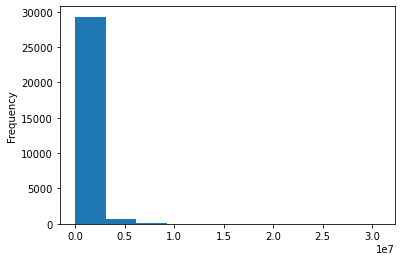

In [17]:
df['price'].plot.hist();

Not super normal -- looks like right skewed due to some outlier very expensive homes sold.  Depending on model results, might apply a log transformation, or drop outliers.

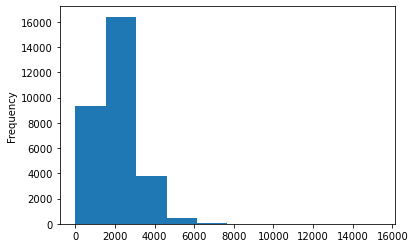

In [18]:
df['sqft_living'].plot.hist();

More normal looking than the price distribution, but not a completely normal distribution either.  Again we see a right skew which might be changed with either a log transformation or a dropping of outliers. Will need to dig further and circle back to.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

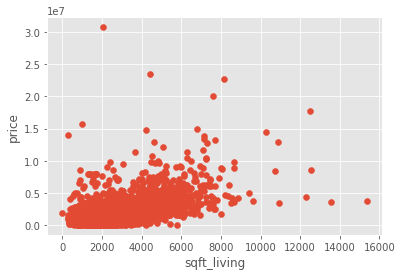

In [20]:
fig, ax = plt.subplots()
plt.scatter(df['sqft_living'], df['price'])
ax.set_xlabel('sqft_living')
ax.set_ylabel('price');

Not a super linear relationship, but we will give it a go anyhow.

## Model Iteration

In [21]:
X_simple = df[['sqft_living']]
y = df['price']

In [22]:
import statsmodels.api as sm
model_simple = sm.OLS(y, sm.add_constant(X_simple))
results_simple = model_simple.fit()
print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:01:51   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

The r-squared statistic is showing that this simple linear regression is explaining about 37% of the variance in sale price.  The model, intercept beta, and the coefficient for our variable `sqft_living` are all statistically significant. The model is predicting that a house with zero square feet living area would sell for negative $75.6k, and for each one squre foot increase in living area, a house would become $560 more expensive. 

### Note here about omnibus and JB -- have to reject null that the assumptions of linear regression are being met...

Not a fabulous model. Let's see if we can improve it.

# The Zone Variable

## Upon much research, I do not think this is a viable avenue to pursue at this time.  
Cannot currently find a way to get accurate zoning information based off address or long/lat at this time. I was able to find an interactive map that would allow input of address and give information on the building (though not accurate zone information), as well as maps that showed zones, but not by any tangible data I could then transfer into this project. :(

In [23]:
test = df[['address']]
test['city'] = test['address'].map(lambda x: x.split(',')[1].strip())

<ipython-input-23-cb4be4a38c82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['city'] = test['address'].map(lambda x: x.split(',')[1].strip())


In [24]:
test['city'].value_counts()[300:]

Litchville               1
Mount Vernon             1
Saint Cloud              1
South Orange             1
Dash Point               1
Maple Grove              1
Los Angeles              1
East Providence          1
Colfax                   1
Oakland                  1
Everett                  1
17122 W Interstate 10    1
Lodi                     1
Sault Ste. Marie         1
Cottage Lake             1
Spanaway                 1
Park River               1
Pea Ridge                1
Menominee                1
San Mateo                1
West Allis               1
Grand Forks              1
Pierz                    1
Name: city, dtype: int64

In [25]:
test['state'] = test['address'].map(lambda x: x.split(',')[2].strip()[:10])

<ipython-input-25-eadb407e8c9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['state'] = test['address'].map(lambda x: x.split(',')[2].strip()[:10])


In [26]:
test['state'].value_counts()

Washington    29200
Nebraska 6      158
New Jersey       76
New York 1       66
Minnesota        63
              ...  
San Franci        1
Iowa 50237        1
Idaho 8371        1
Utah 84790        1
Ohio 45403        1
Name: state, Length: 82, dtype: int64

Apparently, not all of the houses in this list are in Kings County Washington (or not even in Washington State at all!).  I'll delete any entries that are not in Washington State and from there go back to the counties list to see if I have a more managable list to then pull zoneing information for.

In [27]:
df['state'] = df['address'].map(lambda x: x.split(',')[2].strip()[:10])

In [28]:
df = df[df['state'] == 'Washington']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29200 non-null  int64  
 1   date           29200 non-null  object 
 2   price          29200 non-null  float64
 3   bedrooms       29200 non-null  int64  
 4   bathrooms      29200 non-null  float64
 5   sqft_living    29200 non-null  int64  
 6   sqft_lot       29200 non-null  int64  
 7   floors         29200 non-null  float64
 8   waterfront     29200 non-null  object 
 9   greenbelt      29200 non-null  object 
 10  nuisance       29200 non-null  object 
 11  view           29200 non-null  object 
 12  condition      29200 non-null  object 
 13  grade          29200 non-null  object 
 14  heat_source    29200 non-null  object 
 15  sewer_system   29200 non-null  object 
 16  sqft_above     29200 non-null  int64  
 17  sqft_basement  29200 non-null  int64  
 18  sqft_g

In [29]:
test = df[['address']]
test['city'] = test['address'].map(lambda x: x.split(',')[1].strip())

<ipython-input-29-cb4be4a38c82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['city'] = test['address'].map(lambda x: x.split(',')[1].strip())


In [30]:
test['city'].value_counts()[:30]

Seattle             9363
Renton              1943
Kent                1583
Auburn              1508
Bellevue            1482
Kirkland            1270
Federal Way         1167
Redmond              985
Sammamish            976
Maple Valley         887
Shoreline            798
Burien               615
Woodinville          588
Issaquah             564
Covington            502
North Bend           466
Enumclaw             458
Des Moines           423
Mercer Island        349
Kenmore              347
Snoqualmie           291
Black Diamond        278
Bothell              263
SeaTac               253
Duvall               246
Lake Forest Park     218
Vashon               190
Newcastle            187
Tukwila              178
Carnation            157
Name: city, dtype: int64

# Adding more variables - preprocessing the categorical variables

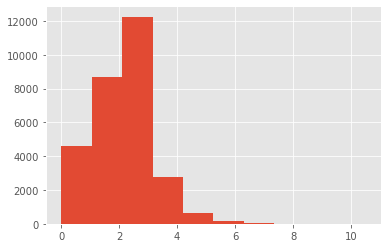

In [31]:
df['bathrooms'].hist();

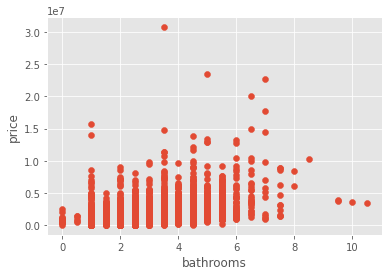

In [32]:
fig, ax = plt.subplots()
plt.scatter(df['bathrooms'], df['price'])
ax.set_xlabel('bathrooms')
ax.set_ylabel('price');

So that doesn't look linear at all :(.  The distribution of bathrooms was fairly normal, again with a bit of right skew.  From the scatter plot we can see that therre are some outliers both in the number of bathrooms total (10 bathrooms is a lot!) as well as in sale price (note the home with about 3.5 bath that sold for over $3 million).

## Categorical Variables

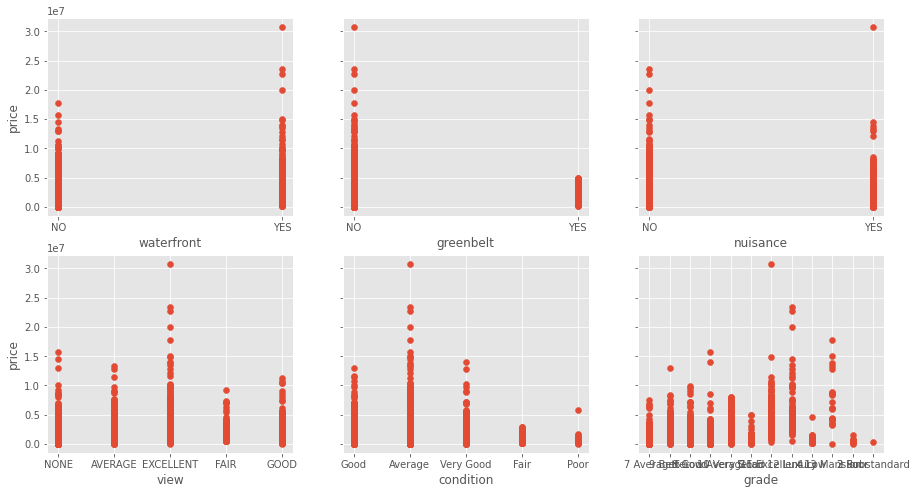

In [45]:
cat_vars = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,8), sharey=True)

for i,cat in enumerate(cat_vars):
    # set proper axis
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    #set x and y
    x = df[cat]
    y_graph = df['price']
    
    ax.scatter(x, y_graph)
    ax.set_xlabel(cat)
    if col == 0:
        ax.set_ylabel('price')

From looking at the above graphs it appears that greenbelt, view, condition and grade might be beneficial to include in the model. As for waterfront, there appears to not be much variation between houses that are or are not on a waterfront.

Furthermore, based on the distributions for condition, grade and view, it would be good to create a 'low end' and 'high end' groupped tier for these variables due to low quantities in each of the ends of the sub categories.

In [59]:
df['nuisance'].value_counts()

NO     24198
YES     5002
Name: nuisance, dtype: int64

In [46]:
cat_vars = df[['waterfront', 'greenbelt', 'nuisance', 'view']]

In [61]:
cat_vars_dummied = pd.get_dummies(cat_vars)
df_a = df[['sqft_living']]
df_b = cat_vars_dummied.drop(['waterfront_NO', 'view_NONE', 'greenbelt_NO', 'nuisance_NO'], axis=1)
df_dummied = pd.concat([df_a, df_b], axis=1)
df_dummied

,sqft_living,waterfront_YES,greenbelt_YES,nuisance_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,1180,0,0,0,0,0,0,0
1,2770,0,0,1,1,0,0,0
2,2880,0,0,0,1,0,0,0
3,2160,0,0,0,1,0,0,0
4,1120,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
30150,1910,0,0,0,0,0,0,0
30151,2020,0,0,0,0,0,1,0
30152,1620,0,0,1,0,0,0,0
30153,2570,0,0,0,0,0,0,0


In [66]:
y = df['price']

In [68]:
X_multi = df_dummied
model_multi = sm.OLS(y, sm.add_constant(X_multi))
results_multi = model_multi.fit()
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     2836.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:59:39   Log-Likelihood:            -4.3323e+05
No. Observations:               29200   AIC:                         8.665e+05
Df Residuals:                   29191   BIC:                         8.665e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.456e+04   9766.690     -7.

This model is doing better than our baseline model.  The R-squared score has improved to .437; our model explains about 44% of the variance in price (with our outlook of inferential statistics this is not super great...).  The model as a whole as well as all of our coefficients (constant included) are statistically significant.   We are still running into the same issue that our model is not meeting the assumptions of linear regression (as seen from the statistically significant Jarque-Bera and Omnibus results).  I think the next steps include looking further into the assumptions (the residuals), and applying some transformations (such as a log transformation to the sqft_living variable) to try and improve the model prior to deciding on the final model and analyzing

- Need to look at notes + data, can I apply transformations to categorical data?
- ALSO, need to remember how to parse out the data based on third variable (look at notes, was this just for graphing or did this apply to the model somehow?  I feel like it did but can't remember how...)
- ALSO ALSO, want to graph some of this out, need to look at it -- how do I graph line of best fit again?

In [76]:
import numpy as np
y_log = df[['price']].copy()
y_log['price_log'] = y_log.apply(lambda x: np.log(x))
y_log

,price,price_log
0,675000.0,13.422468
1,920000.0,13.732129
2,311000.0,12.647548
3,775000.0,13.560618
4,592500.0,13.292106
...,...,...
30150,1555000.0,14.256986
30151,1313000.0,14.087825
30152,800000.0,13.592367
30153,775000.0,13.560618


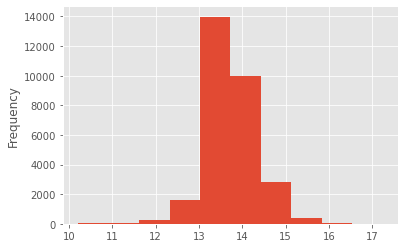

In [78]:
y_log['price_log'].plot.hist();

In [79]:
model_y_log = sm.OLS(y_log['price_log'], sm.add_constant(X_multi))
results_y_log = model_y_log.fit()
print(results_y_log.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2560.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:15:54   Log-Likelihood:                -18035.
No. Observations:               29200   AIC:                         3.609e+04
Df Residuals:                   29191   BIC:                         3.616e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9496      0.007   1984.

# REALLY NEED TO LOOK AT NOTES!!
So this model is now explaining even less of the variance than the one without the logged price variable... Probably need to log the sqft_living too (based on histogram), but what I CAN'T remember is if I need to center the data frist??? Would that help???

Again, really need to look at notes for this...  wil circle back to soon :)

# Analysis

# Conclusions

# Next Steps